# Read all training data set

In [1]:
import os
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [2]:
train_covid_dir = os.path.join('train/covid')
train_normal_dir = os.path.join('train/normal')

print('total training covid images: ', len(os.listdir(train_covid_dir)))
print('total normal images: ', len(os.listdir(train_normal_dir)))

covid_files = os.listdir(train_covid_dir)
print(covid_files[:10])

normal_files = os.listdir(train_normal_dir)
print(normal_files[:10])

total training covid images:  144
total normal images:  144
['01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', '03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg', '1-s2.0-S0140673620303706-fx1_lrg.jpg', '1-s2.0-S0929664620300449-gr2_lrg-a.jpg', '1-s2.0-S0929664620300449-gr2_lrg-b.jpg', '1-s2.0-S0929664620300449-gr2_lrg-c.jpg', '1-s2.0-S0929664620300449-gr2_lrg-d.jpg', '1-s2.0-S1684118220300608-main.pdf-001.jpg', '1-s2.0-S1684118220300608-main.pdf-002.jpg', '1-s2.0-S1684118220300682-main.pdf-002-a1.png']
['IM-0140-0001.jpeg', 'IM-0151-0001.jpeg', 'IM-0158-0001.jpeg', 'IM-0172-0001.jpeg', 'IM-0189-0001.jpeg', 'IM-0214-0001.jpeg', 'IM-0215-0001.jpeg', 'IM-0222-0001.jpeg', 'IM-0235-0001.jpeg', 'IM-0241-0001.jpeg']


# Displaying some of the images

(1482, 1989, 3)


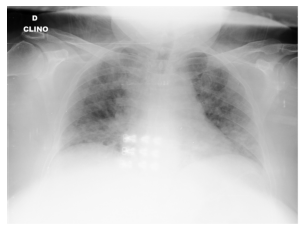

(1632, 1610, 3)


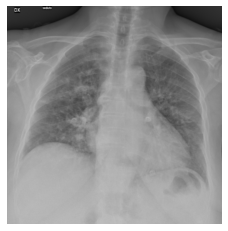

(1237, 1156)


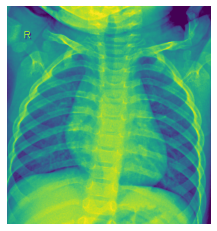

(1156, 1518)


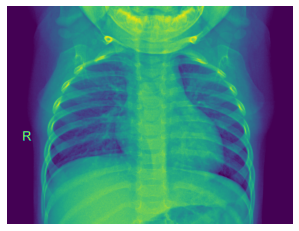

In [3]:
pic_index = 2
next_covid = [os.path.join(train_covid_dir, fname) for fname in covid_files[
    pic_index-2: pic_index]]
next_normal = [os.path.join(train_normal_dir, fname) for fname in normal_files[
    pic_index-2: pic_index]]

for i, img_path in enumerate(next_covid+ next_normal):
    img = mpimg.imread(img_path)
    print(np.array(img).shape)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [4]:
training_dir = 'Train'
training_datagen = ImageDataGenerator(rescale = 1.0/255,
                                      featurewise_center=True,
                                      featurewise_std_normalization=True,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode = 'nearest')

validation_dir = 'Val'
validation_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = training_datagen.flow_from_directory(training_dir,
                                                      target_size = (100,100),
                                                      class_mode = 'categorical',
                                                      batch_size = 32)
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                      target_size = (100,100),
                                                      class_mode = 'categorical',
                                                      batch_size = 32)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')])

Found 288 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])
history = model.fit(train_generator, epochs = 60, steps_per_epoch=4, validation_data = validation_generator, verbose = 1, validation_steps=2)
model.save('model.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4 steps, validate for 2 steps
Epoch 1/20


C:\Users\HP\.conda\envs\gputest\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\HP\.conda\envs\gputest\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


4/4 [==============================] - 12s 3s/step - loss: 0.6484 - accuracy: 0.7344 - val_loss: 0.1951 - val_accuracy: 0.9167
Epoch 2/20
4/4 [==============================] - 10s 3s/step - loss: 0.4582 - accuracy: 0.8359 - val_loss: 0.2435 - val_accuracy: 0.9500
Epoch 3/20
4/4 [==============================] - 10s 3s/step - loss: 0.2785 - accuracy: 0.8984 - val_loss: 0.1830 - val_accuracy: 0.9333
Epoch 4/20
4/4 [==============================] - 10s 3s/step - loss: 0.2634 - accuracy: 0.9141 - val_loss: 0.2726 - val_accuracy: 0.8667
Epoch 5/20
4/4 [==============================] - 11s 3s/step - loss: 0.3232 - accuracy: 0.8438 - val_loss: 0.1400 - val_accuracy: 0.9667
Epoch 6/20
4/4 [==============================] - 10s 3s/step - loss: 0.2411 - accuracy: 0.9219 - val_loss: 0.0643 - val_accuracy: 0.9667
Epoch 7/20
4/4 [==============================] - 10s 3s/step - loss: 0.2719 - accuracy: 0.8984 - val_loss: 0.2546 - val_accuracy: 0.8500
Epoch 8/20
4/4 [=============================

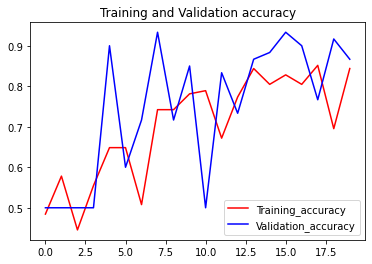

<Figure size 432x288 with 0 Axes>

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training_accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation_accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 0)
plt.figure()
plt.show()

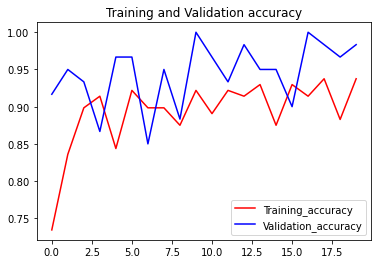

<Figure size 432x288 with 0 Axes>

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training_accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation_accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 0)
plt.figure()
plt.show()

In [13]:
import numpy as np
from keras.preprocessing import image
path = 'Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg'
img = image.load_img(path, target_size=(100, 100))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes)
# [[1 0]] for covid and [[0 1]] for normal

[[1. 0.]]
